# Boltzmann Lattice (Fluid flow)

## Simulation setup & execution

Fig. colour plots 1 is saved to./figures/


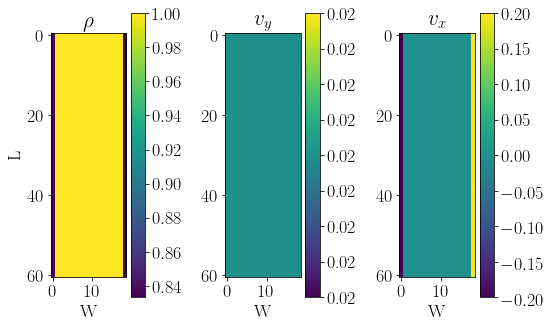

Fig. colour plots 200 is saved to./figures/


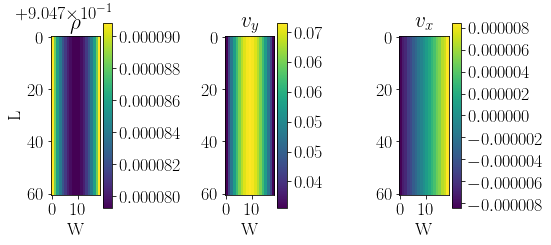

Fig. colour plots 400 is saved to./figures/


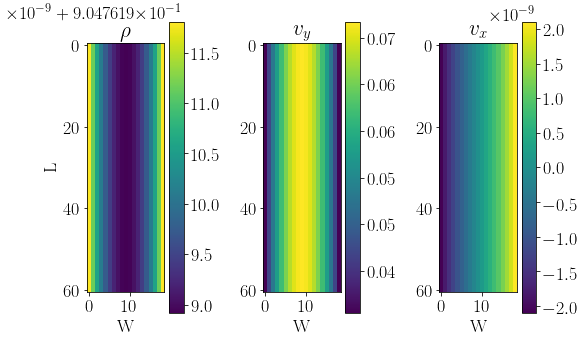

Fig. colour plots 600 is saved to./figures/


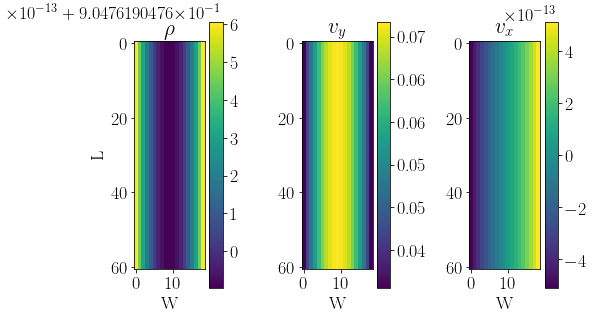

Fig. colour plots 800 is saved to./figures/


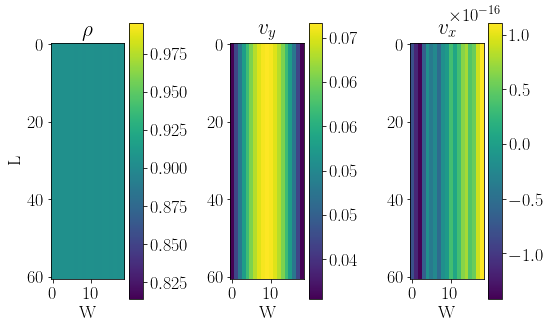

Fig. colour plots 1000 is saved to./figures/


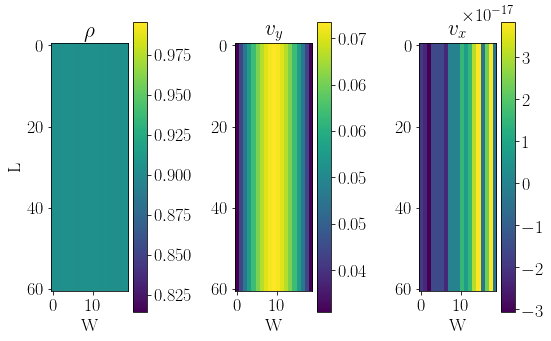

Fig. colour plots 1000 is saved to./figures/


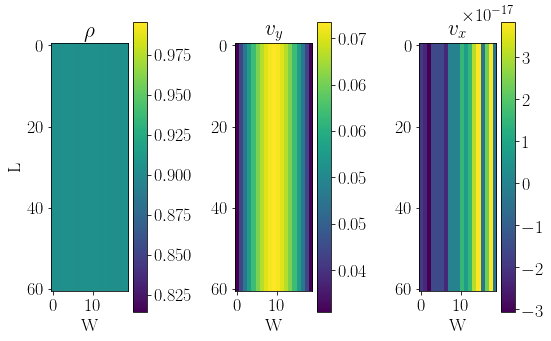

Fig. velocity profile is saved to./figures/
Maximum number of iterations (1000) have been reached. It is adviced to increase the maximum number of iterations or increase the error tolerance (epsilon).
----------------------------
Reynolds_pipe = 0.507135919636
Total run time = 13.571420431137085


In [6]:
import time as tm
from types import SimpleNamespace
from Boltzmann_simulation import *
from constants import *

start_time = tm.time()

# Create name space
sim = SimpleNamespace()

# Assign system dimensions/parameters
sim.L, sim.W = 60, 20
sim.m = 1
sim.P = 1
sim.epsilon = 0#0.001
sim.max_iterations = 1000
sim.plot_iteration = 200
sim.nu = 2
sim.dv = 0.01

# Square obstruction
sim.obs = 'none' # obstruction type (none, square or cylinder) 
sim.R = int(sim.W/4)

#Load constants
sim = constants(sim)

# Set data processing parameters
sim.fig_dir = './figures/'
sim.save = True

# Actual simulation
par = boltzmann_sim(sim)

Reynolds_pipe, Reynolds_obs = Reynolds(sim, par)
    
end_time = tm.time()
total_time = end_time - start_time
print('Total run time =', total_time)

## Simulation performance

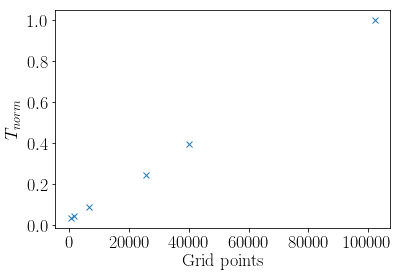

In [10]:
norm_time = np.array([0.035680751, 0.044131455, 0.091079812, 0.246948357, 0.398122066, 1])
grid_number = np.array([400, 1600, 6400, 25600, 40000, 102400])


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.plot(grid_number, norm_time, 'x')
plt.ylabel('$T_{norm}$')
plt.xlabel('Grid points')
plt.show()